# Trabajo Académico Modelos de Machine Learning para el análisis de factores socioeconómicos en la detección de riesgos de salud mental

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df_SM = pd.read_csv("DAT SALUD MENTAL - ATENDIDOS.csv", encoding='latin1') # salud mental
df_PD = pd.read_excel("GeoPeru-peru_distritos.xlsx") # peru distritos

print(df_SM.shape)
print(df_PD.shape)

(52611, 11)
(1874, 109)


In [3]:
# prompt: Agrupa las filas de df_SM por Departamento, provinica y distrito y suma las cantidades de Atenciones

df_agrupado = df_SM.groupby(['Departamento', 'Provincia', 'Distrito'])['Atenciones'].sum().reset_index()

In [4]:
df = pd.merge(df_PD,df_agrupado, left_on=['nom_dpto', 'nom_prov', 'nom_dist'], right_on=['Departamento', 'Provincia', 'Distrito'], how='inner')
df

,total_pers,almenosuna,almenosu_1,nbi1_abs,nbi1_porc,nbi2_abs,nbi2_porc,nbi3_abs,nbi3_porc,nbi4_abs,...,pgr_quin1,pgr_quin2,pgr_quin3,pgr_quin4,pgr_quin5,fuente,Departamento,Provincia,Distrito,Atenciones
0,2260,703,31.1,1,0.0,239,10.6,447,19.8,0,...,7.086268,8.142606,10.079225,7.086268,5.105634,Instituto Nacional de Estadística e Informátic...,APURIMAC,AYMARAES,TINTAY,52
1,708,143,20.2,27,3.8,72,10.2,19,2.7,5,...,7.733333,10.666667,10.933333,7.866667,4.933333,Instituto Nacional de Estadística e Informátic...,APURIMAC,ANDAHUAYLAS,HUAYANA,3
2,1803,1095,60.7,45,2.5,166,9.2,880,48.8,92,...,7.659799,7.765452,9.297412,6.497623,5.124142,Instituto Nacional de Estadística e Informátic...,APURIMAC,AYMARAES,CHAPIMARCA,133
3,683,64,9.4,0,0.0,35,5.1,10,1.5,5,...,7.359307,8.513709,9.956710,8.369408,6.637807,Instituto Nacional de Estadística e Informátic...,APURIMAC,AYMARAES,COLCABAMBA,21
4,1660,818,49.3,172,10.4,320,19.3,568,34.2,16,...,7.188778,8.942139,12.390415,4.909410,2.805377,Instituto Nacional de Estadística e Informátic...,APURIMAC,ANTABAMBA,JUAN ESPINOZA MEDRANO,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,37236,12329,33.1,8248,22.2,4435,11.9,921,2.5,760,...,8.705036,9.773515,9.213962,8.390621,8.238742,Instituto Nacional de Estadística e Informátic...,PIURA,SULLANA,BELLAVISTA,1029
905,4083,1928,47.2,496,12.1,1125,27.6,265,6.5,66,...,10.052157,12.754860,15.410147,9.388336,5.523945,Instituto Nacional de Estadística e Informátic...,AYACUCHO,LA MAR,CHUNGUI,20
906,3470,2312,66.6,2017,58.1,351,10.1,134,3.9,91,...,10.561151,11.107914,12.143885,8.719424,7.395683,Instituto Nacional de Estadística e Informátic...,HUANUCO,LEONCIO PRADO,HERMILIO VALDIZAN,28
907,261864,27841,10.6,1689,0.6,21939,8.4,106,0.0,4416,...,5.761835,6.224660,6.392723,7.247943,8.533940,Instituto Nacional de Estadística e Informátic...,LIMA,LIMA,LIMA,731


# PREPROCESAMIENTO

In [5]:
## DROPEO DE COLUMNAS INNECESARIAS
columnas_innecesarias = ['almenosu_1','nom_dpto','nom_prov','nom_dist','fuente','Departamento','Provincia','Distrito']
df = df.drop(columns=columnas_innecesarias)


Se seleccionó la variable target "Atenciones" (cantidad de personas atendidas por problemas de salud mental) debido a que:
- Es un indicador observable y medible de la demanda real
- A pesar de no todos los casos de salud mental son antendidos, esta variable suele tener una fuerte correlación, reflejando de forma indirecta el riesgo de salud mental en la población
- Permite priorizar recursos de salud pública, asignando recursos preventiva y equitativamente

In [6]:
target = "Atenciones"
X = df.drop(columns=[target])
y = df[target]
df

,total_pers,almenosuna,nbi1_abs,nbi1_porc,nbi2_abs,nbi2_porc,nbi3_abs,nbi3_porc,nbi4_abs,nbi4_porc,...,p_pea,p_pea_o,p_pea_d,p_pei,pgr_quin1,pgr_quin2,pgr_quin3,pgr_quin4,pgr_quin5,Atenciones
0,2260,703,1,0.0,239,10.6,447,19.8,0,0.0,...,58.758803,56.954225,1.804577,17.297535,7.086268,8.142606,10.079225,7.086268,5.105634,52
1,708,143,27,3.8,72,10.2,19,2.7,5,0.7,...,30.133333,27.733333,2.400000,42.533333,7.733333,10.666667,10.933333,7.866667,4.933333,3
2,1803,1095,45,2.5,166,9.2,880,48.8,92,5.1,...,31.325938,27.892235,3.433703,46.064448,7.659799,7.765452,9.297412,6.497623,5.124142,133
3,683,64,0,0.0,35,5.1,10,1.5,5,0.7,...,51.082251,45.165945,5.916306,25.685426,7.359307,8.513709,9.956710,8.369408,6.637807,21
4,1660,818,172,10.4,320,19.3,568,34.2,16,1.0,...,46.464056,43.892461,2.571596,27.118644,7.188778,8.942139,12.390415,4.909410,2.805377,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,37236,12329,8248,22.2,4435,11.9,921,2.5,760,2.0,...,41.377565,38.896882,2.480682,32.584599,8.705036,9.773515,9.213962,8.390621,8.238742,1029
905,4083,1928,496,12.1,1125,27.6,265,6.5,66,1.6,...,28.947368,27.714557,1.232812,35.727833,10.052157,12.754860,15.410147,9.388336,5.523945,20
906,3470,2312,2017,58.1,351,10.1,134,3.9,91,2.6,...,34.474820,33.496403,0.978417,33.899281,10.561151,11.107914,12.143885,8.719424,7.395683,28
907,261864,27841,1689,0.6,21939,8.4,106,0.0,4416,1.7,...,52.401696,49.907957,2.493740,30.495767,5.761835,6.224660,6.392723,7.247943,8.533940,731


In [7]:
columnas = df.columns.tolist()
print(columnas)

['total_pers', 'almenosuna', 'nbi1_abs', 'nbi1_porc', 'nbi2_abs', 'nbi2_porc', 'nbi3_abs', 'nbi3_porc', 'nbi4_abs', 'nbi4_porc', 'nbi5_abs', 'nbi5_porc', 'cod_dpto', 'cod_prov', 'cod_dist', 'num_hog', 'c1nbi_abs', 'c1nbi_porc', 'c2nbi_abs', 'c2nbi_porc', 'c3nbi_abs', 'c3nbi_porc', 'c4nbi_abs', 'c4nbi_porc', 'c5nbi_abs', 'c5nbi_porc', 'num_viv_pa', 'num_viv_op', 'vs_agua_rp', 'pvs_agua_r', 'vs_sh', 'pvs_sh', 'vs_aelec', 'pvs_aelec', 'v_ptierra', 'pv_ptierra', 'h_lenna', 'ph_lenna', 'hs_pclptb', 'phs_pclptb', 'hs_tcelu', 'phs_tcelu', 'hs_inter', 'phs_inter', 'v_1hab', 'pv_1hab', 'h_cocin', 'ph_cocin', 'sup_tot', 'pob_total', 'c5_p2_1', 'c5_p2_2', 'gr_quin_1', 'gr_quin_2', 'gr_quin_3', 'gr_quin_4', 'gr_quin_5', 'gr_edad_1', 'gr_edad_2', 'gr_edad_3', 'gr_edad_4', 'gr_edad_5', 'c5_p8_1', 'c5_p8_6', 'c5_p9_3', 'c5_p9_4', 'c5_p9_5', 'c5_p9_6', 'c5_p10_1', 'c5_p10_4', 'c5_p12_1', 'c5_p12_2', 'pet', 'pea', 'peao', 'pead', 'pei', 'p_sex_h', 'p_sex_m', 'p_ge_0a14', 'p_ge_15a29', 'p_ge_30a44', 'p_

# SELECCION DE VARIABLES
### METODO FILTRO

In [82]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=50)  # elige las 20 mejores características
X_new = selector.fit_transform(X, y)

# Obtener los nombres de las columnas seleccionadas
selected_features = X.columns[selector.get_support()]

print("Características seleccionadas por filtro:")
print(selected_features.tolist())


df = df[selected_features.tolist()]

Características seleccionadas por filtro:
['total_pers', 'almenosuna', 'nbi1_abs', 'nbi2_abs', 'nbi4_abs', 'nbi5_abs', 'num_hog', 'c1nbi_abs', 'c2nbi_abs', 'c3nbi_abs', 'num_viv_pa', 'num_viv_op', 'vs_agua_rp', 'vs_sh', 'vs_aelec', 'v_ptierra', 'hs_pclptb', 'phs_pclptb', 'hs_tcelu', 'hs_inter', 'phs_inter', 'v_1hab', 'pob_total', 'c5_p2_1', 'c5_p2_2', 'gr_quin_1', 'gr_quin_2', 'gr_quin_3', 'gr_quin_4', 'gr_quin_5', 'gr_edad_1', 'gr_edad_2', 'gr_edad_3', 'gr_edad_4', 'gr_edad_5', 'c5_p8_1', 'c5_p8_6', 'c5_p9_3', 'c5_p9_4', 'c5_p9_5', 'c5_p9_6', 'c5_p10_1', 'c5_p10_4', 'c5_p12_1', 'c5_p12_2', 'pet', 'pea', 'peao', 'pead', 'pei']


### METODO WRAPPER

In [14]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

modelos = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, solver='liblinear'),
    'SVM': SVC(kernel='linear'),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

resultados = {}

for nombre, modelo in modelos.items():
    print(f"\nEjecutando RFECV para: {nombre}")
    rfecv = RFECV(
        estimator=modelo,
        step=20,  # Elimina 5 columnas por iteración
        cv=StratifiedKFold(5),
        scoring='accuracy',
        n_jobs=-1
    )
    rfecv.fit(X, y)

    seleccionadas = X.columns[rfecv.support_].tolist()
    resultados[nombre] = seleccionadas

    print(f"✔️ Características seleccionadas por {nombre}:")
    print(seleccionadas)
    print(f"📈 Mejor accuracy CV: {np.max(rfecv.cv_results_['mean_test_score']):.4f}")
    print(f"Número óptimo de características: {rfecv.n_features_}")


Ejecutando RFECV para: RandomForest


/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is 

✔️ Características seleccionadas por RandomForest:
['nbi2_porc', 'nbi3_abs', 'nbi3_porc', 'cod_dist', 'c2nbi_porc', 'pvs_agua_r', 'pvs_aelec', 'h_lenna', 'v_1hab', 'pv_1hab', 'sup_tot', 'gr_edad_5', 'p_ge_15a29', 'p_af_ning', 'p_dl_hab', 'p_dl_mov', 'p_dl_ent', 'p_dl_rel', 'p_dni', 'p_pea_d', 'p_pei', 'pgr_quin3', 'pgr_quin4', 'pgr_quin5']
📈 Mejor accuracy CV: 0.0528
Número óptimo de características: 24

Ejecutando RFECV para: LogisticRegression


/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/jflxx/miniconda3/lib/python

✔️ Características seleccionadas por LogisticRegression:
['p_ge_45a64']
📈 Mejor accuracy CV: 0.0748
Número óptimo de características: 1

Ejecutando RFECV para: SVM


/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/utils/_response.py:203: UserWarning: The n

✔️ Características seleccionadas por SVM:
['pgr_quin3']
📈 Mejor accuracy CV: 0.0693
Número óptimo de características: 1

Ejecutando RFECV para: DecisionTree


/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/jflxx/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is 

✔️ Características seleccionadas por DecisionTree:
['nbi3_porc', 'p_pea_d', 'pgr_quin1', 'pgr_quin4']
📈 Mejor accuracy CV: 0.0242
Número óptimo de características: 4


In [9]:
atributos_Seleccionados = [
    "h_lenna",        # Hogares con personas que hablan lengua nativa
    "c5_p12_2",       # Cantidad de personas con primaria incompleta
    "c2nbi_porc",     # Porcentaje con NBI2
    "c3nbi_porc",     # Porcentaje con NBI3
    "pvs_agua_r",     # Porcentaje con agua de red pública
    "pvs_aelec",      # Porcentaje con alumbrado eléctrico
    "pv_1hab",        # Porcentaje con solo un ambiente
    "p_pet",          # Porcentaje en edad de trabajar
    "p_pea",          # Porcentaje económicamente activa
    "p_pea_o",        # Porcentaje económicamente activa ocupada
    "p_pea_d",       # Porcentaje económicamente activa desocupada
    "p_pei",          # Porcentaje económicamente inactiva
    "p_af_ning",      # Personas sin afiliación a salud
    "p_dl_hab",       # Personas con dificultad para hablar
    "p_dl_mov",       # Personas con dificultad para moverse
    "p_dl_ent",       # Personas con dificultad para entender
    "p_dl_rel",       # Personas con dificultad para relacionarse
    "p_ge_0a14",      # Población de 0 a 14 años
    "p_ge_15a29",     # Población de 15 a 29 años
    "p_ge_30a44",     # Población de 30 a 44 años
    "p_ge_45a64",     # Población de 45 a 64 años
    "p_ge_65ym" ,      # Población de 65 años a más
    target
]


df = df[atributos_Seleccionados]

<Axes: >

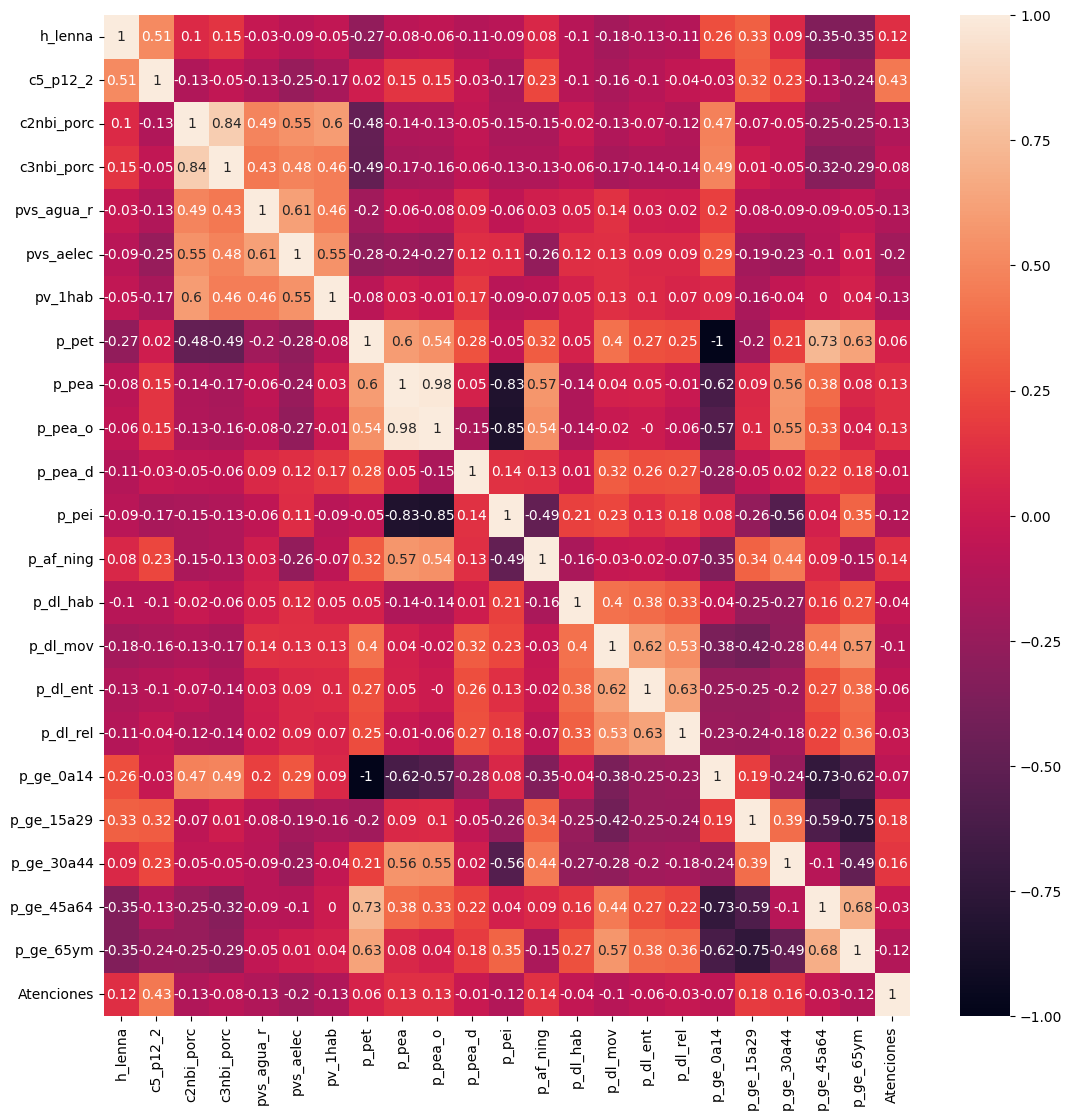

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.corr(numeric_only=True).apply(lambda x: round(x,2))
plt.figure(figsize=(13,13))
sns.heatmap(df_corr,annot=True)

In [11]:
#Despues del analisis vemos que p_pet tiene una relacion clara con p_ge_0a14; Consideramos eliminar p_ge_0a14 porque en ese rango de edad no es muy comun los problemas mentales.
# Consideramos eliminar p_ge_0a14 porque en ese rango de edad no es muy comun los problemas mentales.
# Asimismo eliminamos p_pea_o debido a que resulta redudante (negativamente) con p_pei

df = df.drop(columns=["p_ge_0a14","p_pea_o"])

# MODELO DE REGRESION

In [12]:
from sklearn.linear_model import LinearRegression   # para modelos de regresion lineal
from sklearn.linear_model import Ridge   # Ridge regression
from sklearn.linear_model import Lasso   # Lasso regression
from sklearn.linear_model import ElasticNet  # ElasticNet regression
from sklearn.neighbors import KNeighborsRegressor  # Knn regression
from sklearn.tree import DecisionTreeRegressor   # Decision Trees regression
from sklearn.svm import SVR  # Support Vector regression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split  # para partir los datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold  # para partir la data en k-folds
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion

from sklearn.metrics import mean_squared_error, mean_absolute_error   # para manejar metricas de desempeño
from sklearn.metrics import explained_variance_score  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import r2_score  # para manejar matrices de confusion

### SUAVIZADO
Se observó que la variable objetivo presentaba una distribución altamente dispersa con una cantidad considerable de valores extremos, al tratarse del *target* se decidio aplicarle una transformación logarítmica con el objetivo de reducir tal dispersión así como suavizar el impacto de los "outliers"

In [13]:
from sklearn.preprocessing import StandardScaler
# separa el dataset en atributos (X)  y  target (y)
array = df.values
X = array[:, :-1]  # todas las columnas menos la última
y = array[:, -1]   # solo la última columna
y = np.log1p(y)  # log(1 + y)

# realiza el train-test split
test_size = 0.20    # proporcion de muestras para validacion
seed = 7   # semilla para el generador aleatorio (para reproductibilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('Training: %d ejemplos. Test: %d ejemplos' % (len(y_train), len(y_test)))

Training: 727 ejemplos. Test: 182 ejemplos


In [99]:
# Definimos el pool de algoritmos de ML a evaluar
algos = []
algos.append(('LinearReg', LinearRegression( )))
algos.append(('Ridge', Ridge( )))
algos.append(('Lasso', Lasso()))
algos.append(('ElasticNet', ElasticNet()))
algos.append(('KNN3', KNeighborsRegressor( n_neighbors=3 ) ))
algos.append(('KNN', KNeighborsRegressor( n_neighbors=5 ) ))
algos.append(('RegTrees', DecisionTreeRegressor( )))
algos.append(('RandomFortest', RandomForestRegressor(random_state=42)))

In [59]:
# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold( n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

#  evalua cada algoritmo
for algoname, algo in algos:
    cv_results = cross_val_score(algo, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')  #r2 neg_mean_squared_error
    results.append(cv_results)
    names.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

LinearReg: -2.4680933312937547 (0.49016287303011014)
Ridge: -2.4506328278917224 (0.4797779562251073)
Lasso: -3.314952623960911 (0.26447886897139045)
ElasticNet: -2.9942878280046505 (0.22776629463295076)
KNN3: -2.734929691096063 (0.3806986160772513)
KNN: -2.3542894775836682 (0.20069891189049444)
RegTrees: -3.3682070139114813 (0.39708632554182616)
RandomFortest: -1.9061065290944075 (0.2003681936702377)


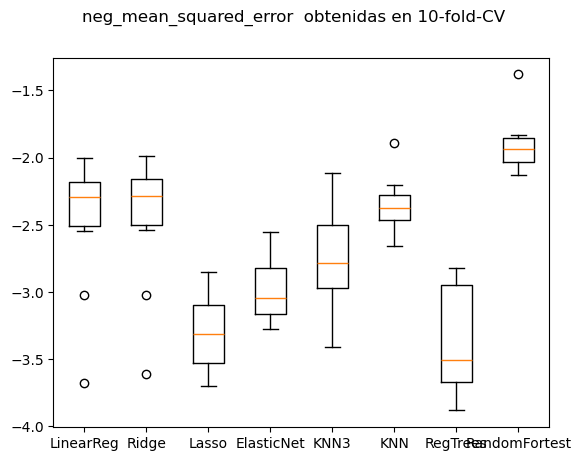

In [ ]:
# Muestra graficamente los resultados de neg_mean_absolute_error  en crossvalidacion de los Algoritmos evaluados
fig = plt.figure()
fig.suptitle('neg_mean_squared_error  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Se observa un notorio mejor rendmiento del algoritmo RandomForest debido a que tiene un menor error cuadrático medio

## ANTES DE REALIZAR EL METODO EMBEBIDO DEL RANDOM FOREST

In [106]:
from sklearn.model_selection import RandomizedSearchCV

# Reentrena modelo de regresion  con todos los datos de entrenamiento y lo prueba en el conjunto de test
model = RandomForestRegressor(random_state=42) #  usar class_weight = 'balanced') para entrenar tomando en cuenta el desbalance
model.fit(X_train, y_train)

# predice el target en el conjunto de test
y_predicted = model.predict(X_test)
print("Mean squared error:", mean_squared_error(y_test, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_test, y_predicted))
print("Explained variance score:", explained_variance_score(y_test, y_predicted))
print("R2 score:", r2_score(y_test, y_predicted))


Mean squared error: 1.9069816883848965
Mean absolute error: 1.0753325506646048
Explained variance score: 0.4470184909899779
R2 score: 0.4409604101209431


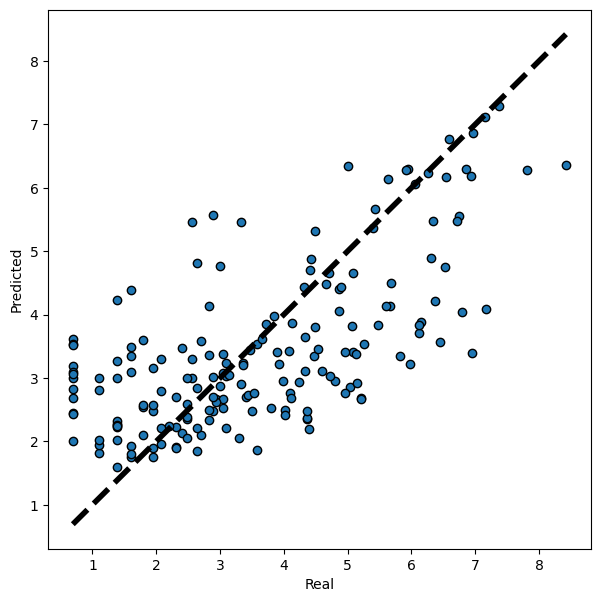

In [104]:
fig, ax = plt.subplots( figsize=[7,7])
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

## PIPELINES
Se evalúa el uso de pipelines para ver si el modelo presenta mejoras

In [94]:
from sklearn.decomposition import PCA

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

# Definimos el pool de pipleines de ML (escalador + algoritmo de ML) a evaluar
pipelines = []
pipelines.append(('pipLinearReg', make_pipeline(MinMaxScaler(), LinearRegression())))
pipelines.append(('pipRidge', make_pipeline(StandardScaler(), Ridge())))
pipelines.append(('pipLasso', make_pipeline(StandardScaler(), Lasso())))
pipelines.append(('pipElasticNet', make_pipeline(StandardScaler(), ElasticNet())))
pipelines.append(('pipKNN', make_pipeline(StandardScaler(), KNeighborsRegressor( ))))
pipelines.append(('pipRegTrees', make_pipeline(StandardScaler(), DecisionTreeRegressor())))
pipelines.append(('pipRegTrees', make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))))


In [96]:
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

#  evalua cada pipeline en crosvalidacion
for pipelinename, pipeline in pipelines:
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(pipelinename)
    print("{}: {} ({})".format(pipelinename, cv_results.mean(), cv_results.std()))

pipLinearReg: -2.468095286355676 (0.4901653453923565)
pipRidge: -2.450945038118209 (0.480388831235814)
pipLasso: -3.314952623960911 (0.26447886897139045)
pipElasticNet: -3.0013126767501785 (0.2202833791269675)
pipKNN: -2.3541950271178798 (0.20851529358836643)
pipRegTrees: -3.4605077305479335 (0.4222547647409451)
pipRegTrees: -1.908595628112704 (0.1957127176278516)


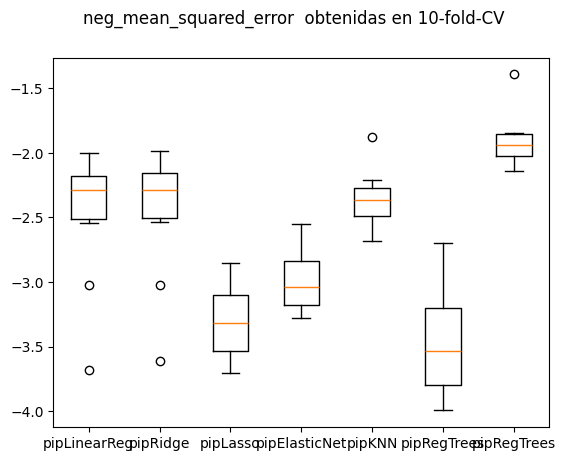

In [97]:
# Muestra graficamente los resultados de balanced_accuracy  en crossvalidacion de los pipelines evaluados
fig = plt.figure()
fig.suptitle('neg_mean_squared_error  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Mean squared error: 1.8987059903269405
Mean absolute error: 1.080767963428676
Explained variance score: 0.44852614952762204
R2 score: 0.4433864653245465


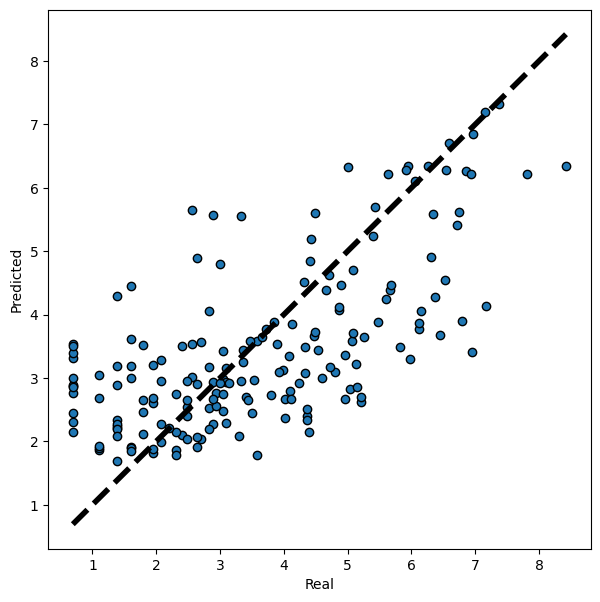

In [98]:
# Reentrena el pipeline con con todos los datos de entrenamiento y lo prueba en el conjunto de validación
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
pipeline.fit(X_train, y_train)

# predice el target en el conjunto de validacion
y_predicted = pipeline.predict(X_test)
print("Mean squared error:", mean_squared_error(y_test, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_test, y_predicted))
print("Explained variance score:", explained_variance_score(y_test, y_predicted))
print("R2 score:", r2_score(y_test, y_predicted))

# Plotea los valores reales vs los predichos en el conjunto de validacion
fig, ax = plt.subplots(figsize=[7,7])
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

Podemos observer que con pipelines no se obtiene una mejora, por lo que se usará el modelo sin el uso de pipelines para el método embebido.

### TENIENDO SELECCIONADO EL MODELO RANDOM FOREST REGRESSOR, SE USARA EL METODO EMBEBIDO

In [118]:
importances = model.feature_importances_
for name, score in sorted(zip(df.columns[:-1], importances), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score:.4f}")

c5_p12_2: 0.3585
pvs_aelec: 0.0639
p_af_ning: 0.0499
h_lenna: 0.0473
pv_1hab: 0.0464
p_ge_65ym: 0.0361
pvs_agua_r: 0.0350
p_pea_d: 0.0334
p_dl_mov: 0.0327
p_ge_45a64: 0.0325
p_pei: 0.0316
p_dl_hab: 0.0296
p_ge_15a29: 0.0264
p_dl_rel: 0.0255
p_dl_ent: 0.0242
c2nbi_porc: 0.0199
p_pea: 0.0196
c3nbi_porc: 0.0165
p_pet: 0.0154
p_ge_30a44: 0.0146


In [19]:
atributos_top14 = [
    "c5_p12_2",       # primaria incompleta
    "pvs_aelec",      # alumbrado eléctrico
    "pv_1hab",        # un solo ambiente
    "p_ge_30a44",     # edad 30 a 44
    "p_pea",          # económicamente activa
    "p_dl_hab",       # dificultad para hablar
    "p_pea_d",        # económicamente desocupada
    "p_ge_15a29",     # edad 15 a 29
    "p_dl_rel",       # dificultad para relacionarse
    "p_ge_45a64",     # edad 45 a 64
    "p_dl_mov",
    "c2nbi_porc",
    "p_ge_65ym",
    "c3nbi_porc"
]
df_reducido = df[atributos_top14 + [df.columns[-1]]]  # incluye la variable target
array = df_reducido.values
X = array[:, :-1]
y = array[:, -1]
y = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# Reentrena modelo de regresion Ridge con todos los datos de entrenamiento y lo prueba en el conjunto de test
model = RandomForestRegressor(random_state=42) #  usar class_weight = 'balanced') para entrenar tomando en cuenta el desbalance
model.fit(X_train, y_train)

# predice el target en el conjunto de test
y_predicted = model.predict(X_test)
print("Mean squared error:", mean_squared_error(y_test, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_test, y_predicted))
print("Explained variance score:", explained_variance_score(y_test, y_predicted))
print("R2 score:", r2_score(y_test, y_predicted))

Mean squared error: 1.7614889631575328
Mean absolute error: 1.0608814482024027
Explained variance score: 0.4862174231307086
R2 score: 0.483612205854954


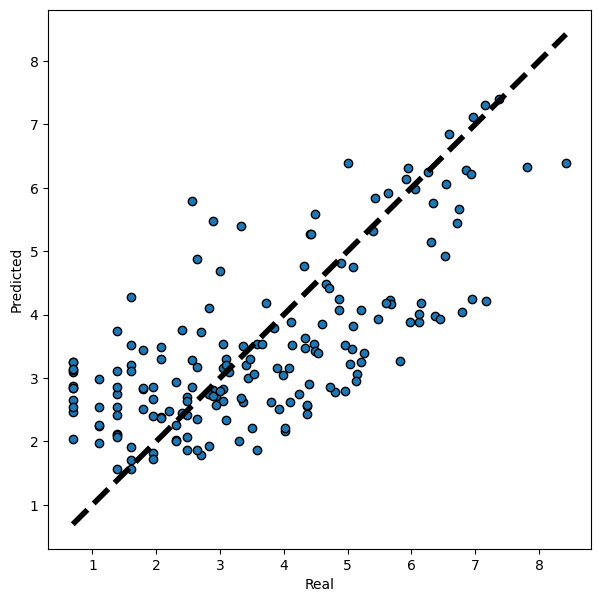

In [15]:
fig, ax = plt.subplots( figsize=[7,7])
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

Podemos observar un modelo con un rendimiento muy similar, por lo tanto nos quedamos con el modelo solo con el top 14 mas influyentes para tener un modelo más simple e interpretable

<Axes: >

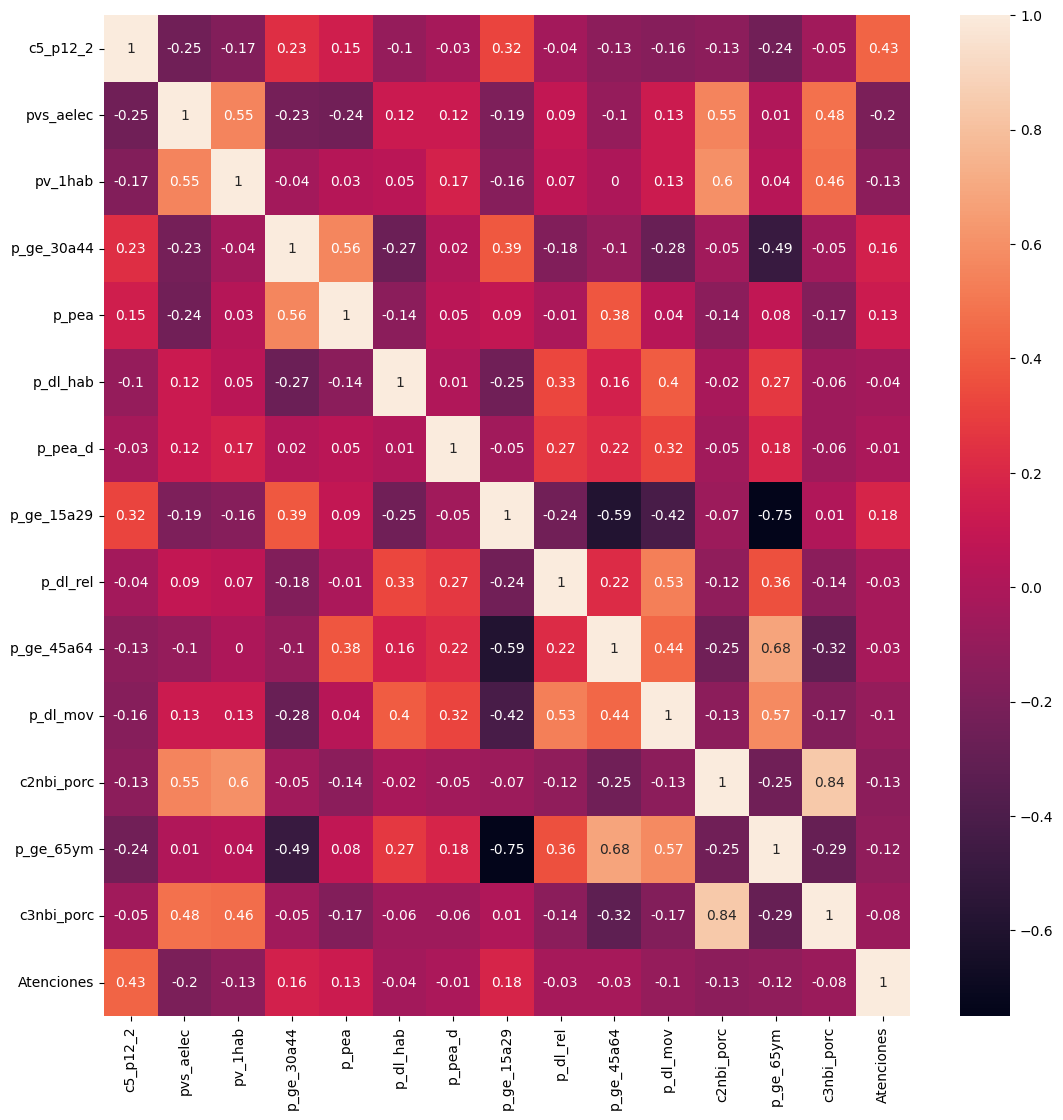

In [20]:
df_corr = df_reducido.corr(numeric_only=True).apply(lambda x: round(x,2))
plt.figure(figsize=(13,13))
sns.heatmap(df_corr,annot=True)

## OTRAS PRUEBAS DE SELECION CON EL METODO EMBEBIDO

Mean squared error: 1.9071553394943739
Mean absolute error: 1.0845727765380626
Explained variance score: 0.44498412873185944
R2 score: 0.4409095035780982


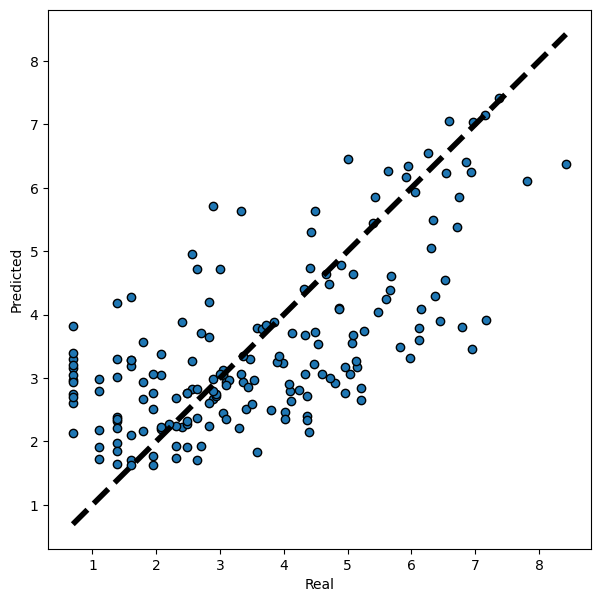

In [34]:
atributos_top15 = [
    "c5_p12_2",       # primaria incompleta
    "pvs_aelec",      # alumbrado eléctrico
    "p_pei",          # económicamente inactiva
    "h_lenna",        # lengua nativa
    "pv_1hab",        # un solo ambiente
    "p_ge_30a44",     # edad 30 a 44
    "pvs_agua_r",     # agua por red
    "p_pea",          # económicamente activa
    "p_dl_hab",       # dificultad para hablar
    "p_pea_d",        # económicamente desocupada
    "p_ge_15a29",     # edad 15 a 29
    "p_af_ning",      # sin afiliación
    "p_dl_rel",       # dificultad para relacionarse
    "p_ge_45a64",     # edad 45 a 64
]
df_reducido = df[atributos_top15 + [df.columns[-1]]]  # incluye la variable target
array = df_reducido.values
X = array[:, :-1]
y = array[:, -1]
y = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# Reentrena modelo de regresion Ridge con todos los datos de entrenamiento y lo prueba en el conjunto de test
model = RandomForestRegressor(random_state=42) #  usar class_weight = 'balanced') para entrenar tomando en cuenta el desbalance
model.fit(X_train, y_train)

# predice el target en el conjunto de test
y_predicted = model.predict(X_test)
print("Mean squared error:", mean_squared_error(y_test, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_test, y_predicted))
print("Explained variance score:", explained_variance_score(y_test, y_predicted))
print("R2 score:", r2_score(y_test, y_predicted))
fig, ax = plt.subplots( figsize=[7,7])
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

Mean squared error: 1.9407328817589464
Mean absolute error: 1.0998085448122659
Explained variance score: 0.43577972876132665
R2 score: 0.4310661078228766


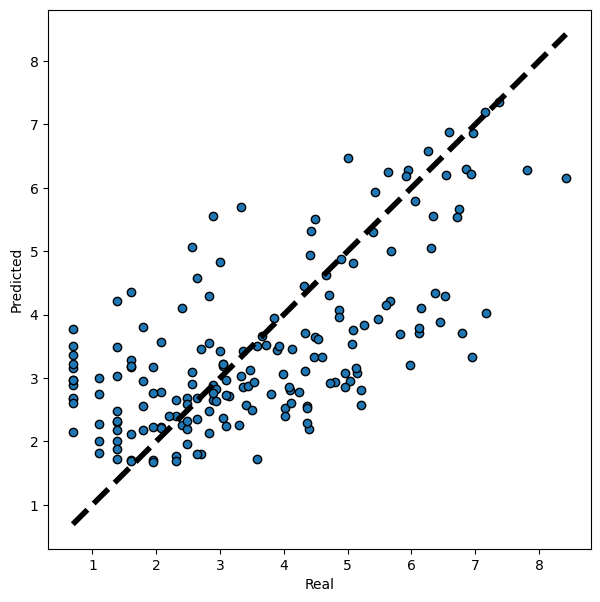

In [35]:
atributos_top15 = [
    "c5_p12_2",       # primaria incompleta
    "pvs_aelec",      # alumbrado eléctrico
    "p_pei",          # económicamente inactiva
    "h_lenna",        # lengua nativa
    "pv_1hab",        # un solo ambiente
    "p_ge_30a44",     # edad 30 a 44
    "pvs_agua_r",     # agua por red
    "p_pea",          # económicamente activa
    "p_dl_hab",       # dificultad para hablar
    "p_pea_d",        # económicamente desocupada
    "p_ge_15a29",     # edad 15 a 29
    "p_af_ning",      # sin afiliación
    "p_dl_rel",       # dificultad para relacionarse
]
df_reducido = df[atributos_top15 + [df.columns[-1]]]  # incluye la variable target
array = df_reducido.values
X = array[:, :-1]
y = array[:, -1]
y = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# Reentrena modelo de regresion Ridge con todos los datos de entrenamiento y lo prueba en el conjunto de test
model = RandomForestRegressor(random_state=42) #  usar class_weight = 'balanced') para entrenar tomando en cuenta el desbalance
model.fit(X_train, y_train)

# predice el target en el conjunto de test
y_predicted = model.predict(X_test)
print("Mean squared error:", mean_squared_error(y_test, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_test, y_predicted))
print("Explained variance score:", explained_variance_score(y_test, y_predicted))
print("R2 score:", r2_score(y_test, y_predicted))
fig, ax = plt.subplots( figsize=[7,7])
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

Mean squared error: 1.9462925117636019
Mean absolute error: 1.0995625341199569
Explained variance score: 0.4340420957461677
R2 score: 0.42943627923217087


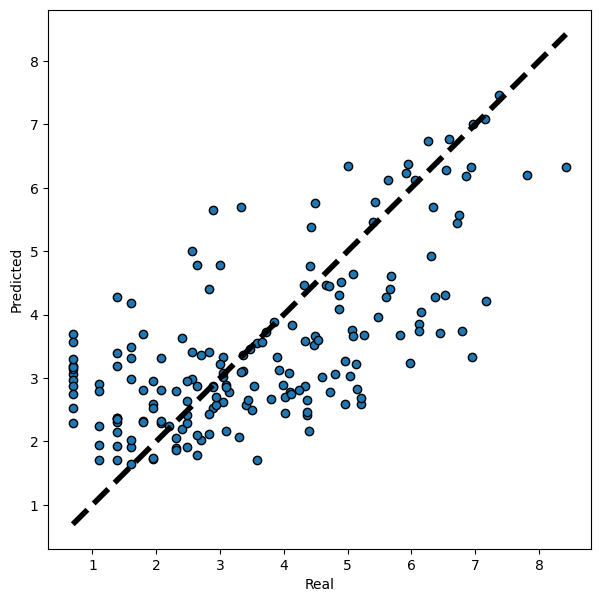

In [48]:
atributos_top15 = [
    "c5_p12_2",       # primaria incompleta
    "pvs_aelec",      # alumbrado eléctrico
    "p_pei",          # económicamente inactiva
    "h_lenna",        # lengua nativa
    "pv_1hab",        # un solo ambiente
    "p_ge_30a44",     # edad 30 a 44
    "pvs_agua_r",     # agua por red
    "p_pea",          # económicamente activa
    "p_dl_hab",       # dificultad para hablar
    "p_pea_d",        # económicamente desocupada
    "p_ge_15a29",     # edad 15 a 29
    "p_af_ning",      # sin afiliación
    "p_dl_rel",       # dificultad para relacionarse
    "p_ge_45a64",     # edad 45 a 64
    "p_dl_ent",        # dificultad para entender
    "p_dl_mov",        # dificultad para moverse
]
df_reducido = df[atributos_top15 + [df.columns[-1]]]  # incluye la variable target
array = df_reducido.values
X = array[:, :-1]
y = array[:, -1]
y = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# Reentrena modelo de regresion Ridge con todos los datos de entrenamiento y lo prueba en el conjunto de test
model = RandomForestRegressor(random_state=42) #  usar class_weight = 'balanced') para entrenar tomando en cuenta el desbalance
model.fit(X_train, y_train)

# predice el target en el conjunto de test
y_predicted = model.predict(X_test)
print("Mean squared error:", mean_squared_error(y_test, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_test, y_predicted))
print("Explained variance score:", explained_variance_score(y_test, y_predicted))
print("R2 score:", r2_score(y_test, y_predicted))
fig, ax = plt.subplots( figsize=[7,7])
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()